## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [28]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [29]:
train, test = keras.datasets.cifar10.load_data()

In [30]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [31]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [32]:
"""Code Here
    建立你的神經網路
"""
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    # input
    input_layer = keras.layers.Input(input_shape)
    
    # hidden
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    # output
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [33]:
LEARNING_RATE = 1e-3
EPOCHS = 7 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [34]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0, 0.25, 0.5, 0.8]
redice_lr_patient = [5, 20]


In [35]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    

    
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=reduce_patient, 
                                  verbose=1)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.00, reduce_patient: 5

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalizati

Epoch 7/7
50000/50000 [==============================] - 28s 557us/step - loss: 1.4006 - acc: 0.5125 - val_loss: 1.5462 - val_acc: 0.4539
Numbers of exp: 3, reduce_factor: 0.25, reduce_patient: 20
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_laye

Train on 50000 samples, validate on 10000 samples
Epoch 1/7
50000/50000 [==============================] - 36s 726us/step - loss: 2.2116 - acc: 0.2627 - val_loss: 2.0502 - val_acc: 0.3185
Epoch 2/7
50000/50000 [==============================] - 29s 573us/step - loss: 1.7460 - acc: 0.3886 - val_loss: 1.7880 - val_acc: 0.3833
Epoch 3/7
50000/50000 [==============================] - 28s 557us/step - loss: 1.6172 - acc: 0.4310 - val_loss: 1.6898 - val_acc: 0.4130
Epoch 4/7
50000/50000 [==============================] - 28s 558us/step - loss: 1.5431 - acc: 0.4582 - val_loss: 1.6312 - val_acc: 0.4266
Epoch 5/7
50000/50000 [==============================] - 28s 565us/step - loss: 1.4860 - acc: 0.4799 - val_loss: 1.5877 - val_acc: 0.4435
Epoch 6/7
50000/50000 [==============================] - 29s 571us/step - loss: 1.4414 - acc: 0.4948 - val_loss: 1.5578 - val_acc: 0.4535
Epoch 7/7
50000/50000 [==============================] - 28s 558us/step - loss: 1.4016 - acc: 0.5123 - val_loss: 1.5429 - 

Epoch 6/7
50000/50000 [==============================] - 33s 669us/step - loss: 2.9298 - acc: 0.1072 - val_loss: 2.9276 - val_acc: 0.1017
Epoch 7/7
50000/50000 [==============================] - 29s 587us/step - loss: 2.9298 - acc: 0.1080 - val_loss: 2.9280 - val_acc: 0.1017
Numbers of exp: 10, reduce_factor: 0.25, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_31 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch

Train on 50000 samples, validate on 10000 samples
Epoch 1/7
50000/50000 [==============================] - 40s 801us/step - loss: 2.9468 - acc: 0.1019 - val_loss: 2.9394 - val_acc: 0.1016
Epoch 2/7
50000/50000 [==============================] - 30s 594us/step - loss: 2.9458 - acc: 0.1011 - val_loss: 2.9391 - val_acc: 0.1016
Epoch 3/7
50000/50000 [==============================] - 29s 582us/step - loss: 2.9465 - acc: 0.1021 - val_loss: 2.9391 - val_acc: 0.1015
Epoch 4/7
50000/50000 [==============================] - 29s 578us/step - loss: 2.9468 - acc: 0.1017 - val_loss: 2.9390 - val_acc: 0.1015
Epoch 5/7
50000/50000 [==============================] - 29s 581us/step - loss: 2.9468 - acc: 0.1011 - val_loss: 2.9387 - val_acc: 0.1018
Epoch 6/7
50000/50000 [==============================] - 30s 593us/step - loss: 2.9475 - acc: 0.1015 - val_loss: 2.9388 - val_acc: 0.1017
Epoch 7/7
50000/50000 [==============================] - 30s 597us/step - loss: 2.9462 - acc: 0.1012 - val_loss: 2.9389 - 

50000/50000 [==============================] - 29s 589us/step - loss: 1.2517 - acc: 0.5591 - val_loss: 1.8524 - val_acc: 0.3650
Epoch 7/7
50000/50000 [==============================] - 29s 577us/step - loss: 1.2064 - acc: 0.5749 - val_loss: 2.1334 - val_acc: 0.3014
Numbers of exp: 17, reduce_factor: 0.00, reduce_patient: 20
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_52 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normaliz

Train on 50000 samples, validate on 10000 samples
Epoch 1/7
50000/50000 [==============================] - 39s 780us/step - loss: 1.8317 - acc: 0.3658 - val_loss: 2.4167 - val_acc: 0.2611
Epoch 2/7
50000/50000 [==============================] - 29s 580us/step - loss: 1.5517 - acc: 0.4540 - val_loss: 4.1321 - val_acc: 0.1610
Epoch 3/7
50000/50000 [==============================] - 29s 586us/step - loss: 1.4402 - acc: 0.4923 - val_loss: 2.1268 - val_acc: 0.3047
Epoch 4/7
50000/50000 [==============================] - 29s 579us/step - loss: 1.3596 - acc: 0.5181 - val_loss: 1.9398 - val_acc: 0.3730
Epoch 5/7
50000/50000 [==============================] - 28s 563us/step - loss: 1.3010 - acc: 0.5404 - val_loss: 2.1619 - val_acc: 0.3201
Epoch 6/7
50000/50000 [==============================] - 29s 585us/step - loss: 1.2557 - acc: 0.5557 - val_loss: 2.3578 - val_acc: 0.2959
Epoch 7/7
50000/50000 [==============================] - 29s 582us/step - loss: 1.2079 - acc: 0.5729 - val_loss: 3.1843 - 

50000/50000 [==============================] - 29s 587us/step - loss: 1.2420 - acc: 0.5621 - val_loss: 1.7850 - val_acc: 0.3920
Epoch 7/7
50000/50000 [==============================] - 29s 586us/step - loss: 1.2048 - acc: 0.5741 - val_loss: 2.4389 - val_acc: 0.3059


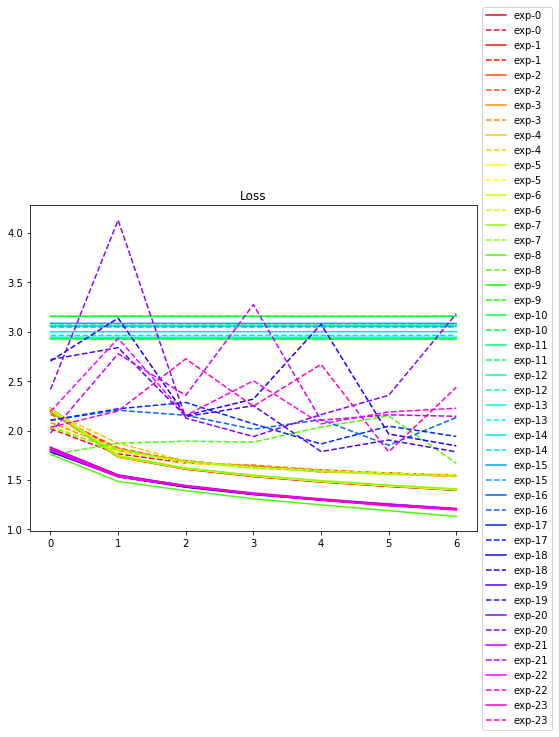

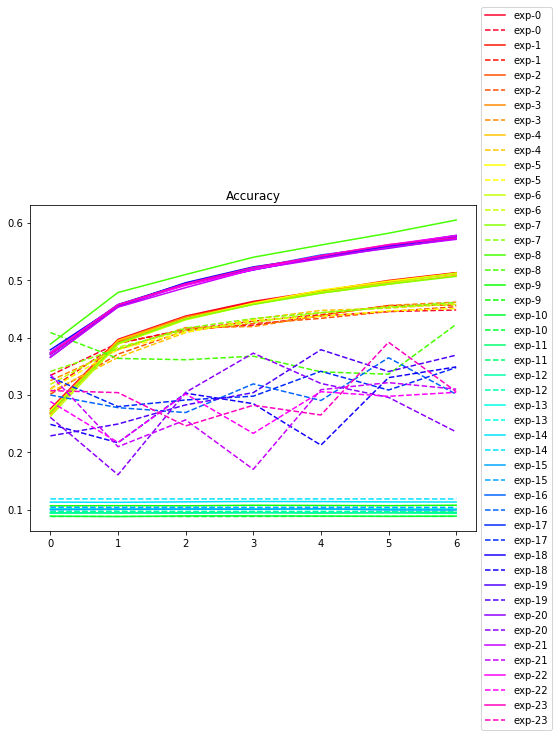

In [36]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()